In [513]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import seaborn as sns
from matplotlib.ticker import FuncFormatter

print("Setup Complete")

Setup Complete


In [514]:
df_house = pd.read_csv('/home/apprenant/PycharmProjects/eda_maison/data/train.csv', sep=',', low_memory=False)

J'affiche les 10 premières lignes

In [515]:
df_house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Je regarde les informations de mon Dataframe

In [516]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Je supprimme les colonnes où 30% au moins des valeurs sont nulles

In [517]:
df_house = df_house.loc[:, df_house.isna().sum() <= 0.3*df_house.shape[0]]

describe les informations de SalePrice

In [518]:
df_house['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Affichez la distribution de SalePrice avec un distplot. Conclure sur la graphique: Que pouvez vous dire?
On peut déduire qu'il y a des valeurs extrêmes et potentiellement aberrante. 
La distribution paraît normale et correctement partagée autour de la moyenne. Si on enlève les valeurs extrêmes on obtien un courbe gaussienne. 

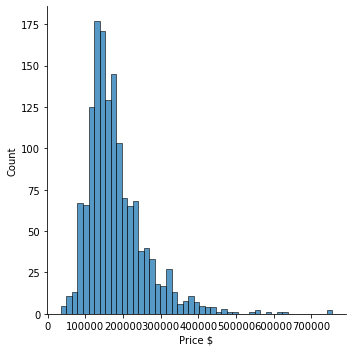

In [519]:
ax = sns.displot(data = df_house, x="SalePrice");
plt.xlabel("Price $");

# Focus variables quantitatives:

In [520]:
df_house_type = df_house.select_dtypes(include=['int64', 'float64'])

In [521]:
df_house_type.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,40,30,0,320,0,0,700,10,2009,143000
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,255,57,0,0,0,0,0,8,2007,307000
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,...,235,204,228,0,0,0,350,11,2009,200000
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,90,0,205,0,0,0,0,4,2008,129900
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,4,0,0,0,0,0,1,2008,118000


Sélectionnez les variables int64 + float64 afin d'afficher les histogrammes pour l'ensemble de ces variables. Qu'elles sont les variables ayant une distribution proche de SalePrice? Que peut on conclure de ces variables?

-


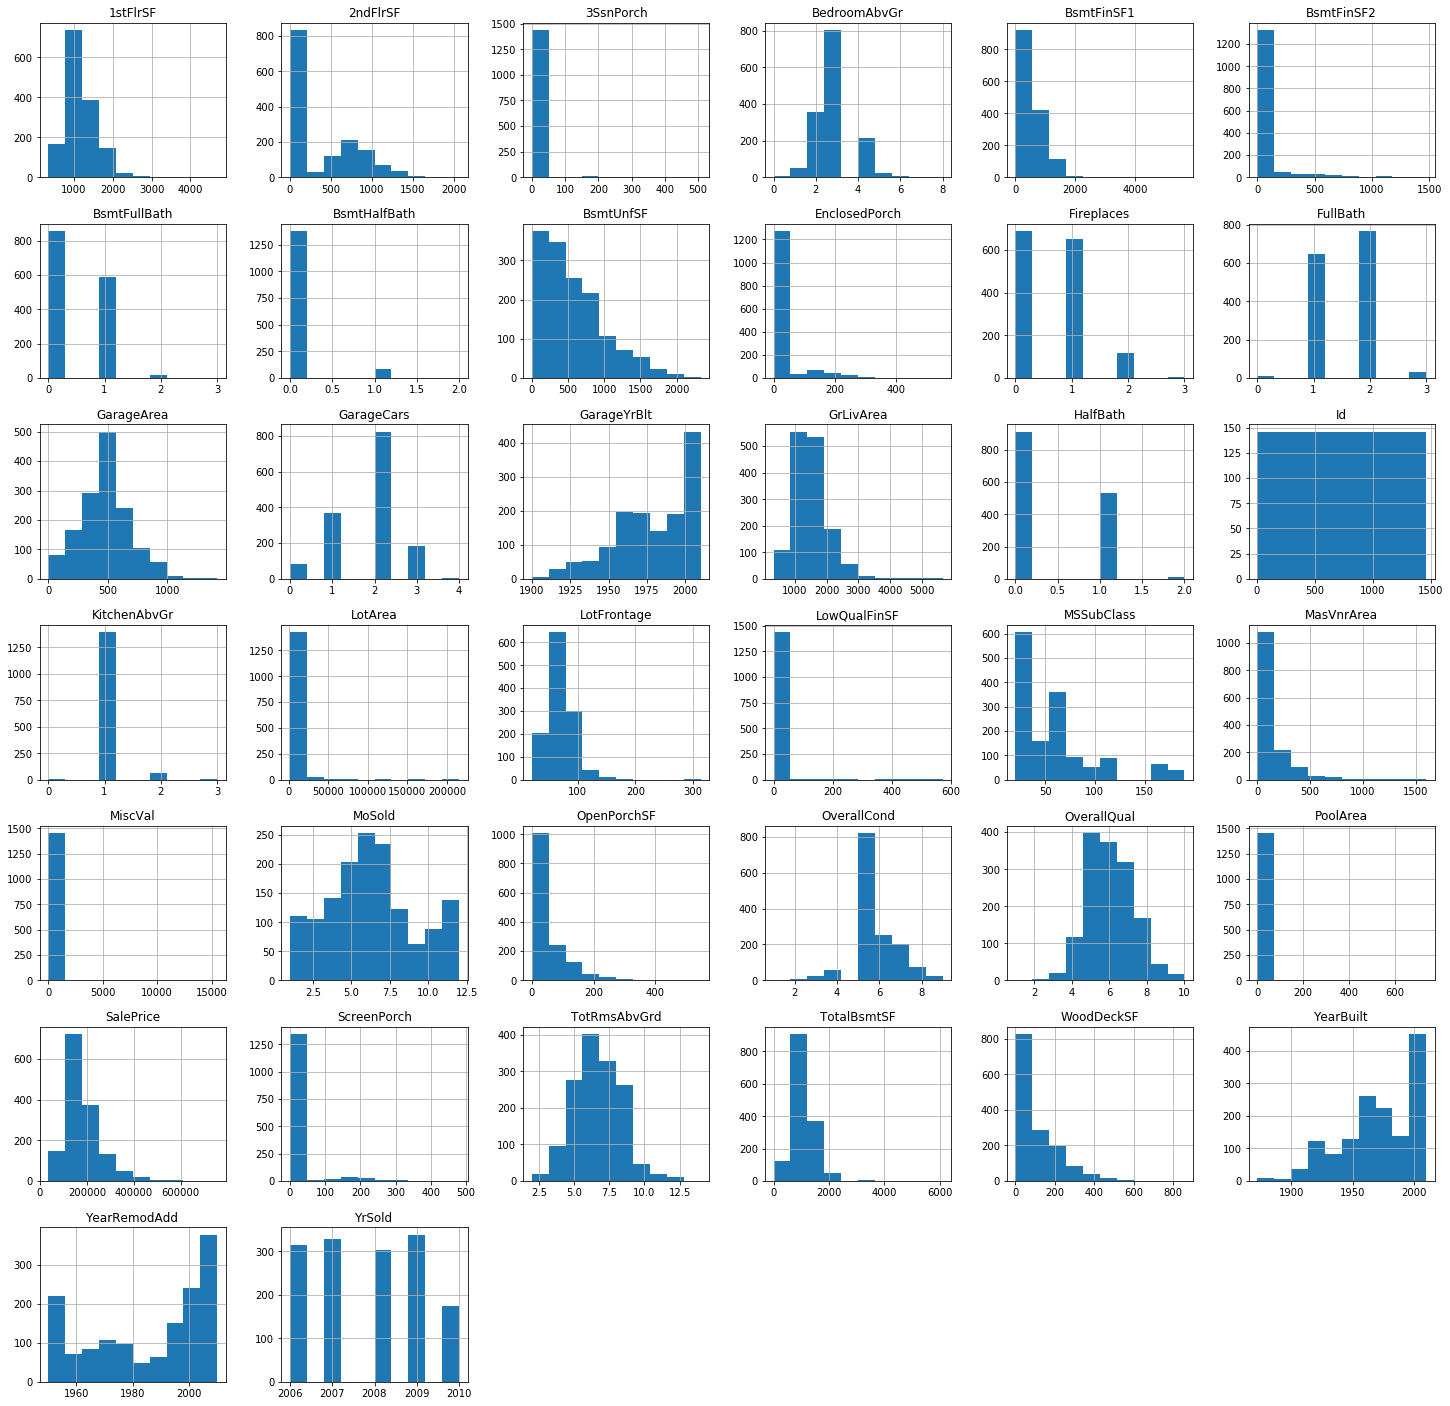

In [522]:
df_house_type.hist(figsize=(25,25))
print("-")

Les variables ayant une distribution proche de SalePrice sont GarageArea, GrLivArea, LotFrontage et 1rstFlrSF. On peut supposer qu'elles sont correlées. 

Toujours sur les variables int64 + float64: Affichez les 10 variables les plus corrélées avec SalePrice (Avec Pandas il est possible de calculer les corrélation avec .corr()).

In [523]:
all_corr = df_house_type.corr()

In [524]:
sale_price_corr = all_corr['SalePrice']

In [525]:
sale_price_core_sort = sale_price_corr.abs().sort_values(ascending=False)
sale_price_core_sort.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [526]:
selected = [
    'SalePrice',
    'OverallQual',
    'GrLivArea',
    'GarageCars',
    'GarageArea',
    'TotalBsmtSF',
    '1stFlrSF',
    'FullBath',
    'TotRmsAbvGrd',
    'YearBuilt', 
    'YearRemodAdd'
]

df_corr= df_house_type.loc[:, selected]

Toujours sur les variables int64 + float64: Réalisez un pairplot permettant d'afficher la relation entre SalePrice et les variables sélectionnés. Quelle est la forme des plot croisant les 3 variables les plus corrélées avec SalePrice?
Les trois variables les plus correllées sont OverallQual, GrLivArea, GarageCars. 


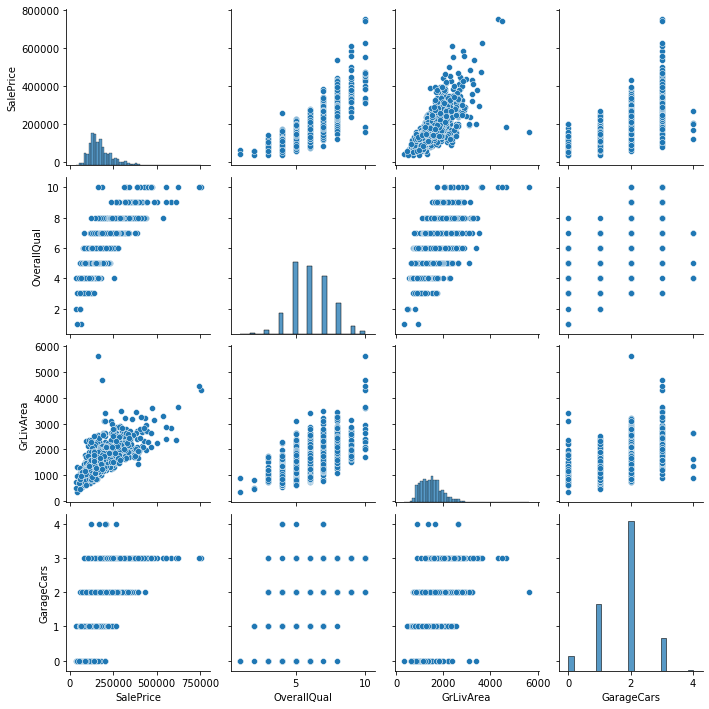

In [527]:
df_pairplot = ['SalePrice',
      'OverallQual',
      'GrLivArea', 
      'GarageCars']

plot_sale_price = df_house_type.loc[:, df_pairplot]
sns.pairplot(plot_sale_price)
plt.show;

Réalisez une heatmap afin de visualiser d'une autre manière les corrélations 2 à 2. Y'a t'il des variables fortement corrélées entre elles? Identifiez les 3 pairs les plus corrélées

Les trois paires les plus corrélées sont:

TotRmsAbvGrd / GrLivArea 
GarageCars / GarageArea 
1stFlrSF / TotalBsmtSF


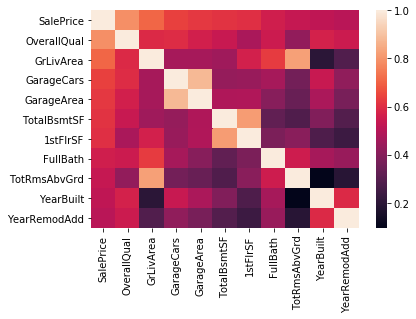

In [528]:
sns.heatmap(df_corr.corr());

Sur cette sélection de variables: ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice'] réalisez un regplot permettant de croiser ces variables avec SalePrice.

In [529]:
new_selection = ['TotalBsmtSF', 
 '1stFlrSF', 
 '2ndFlrSF', 
 'GrLivArea', 
 'FullBath', 
 'TotRmsAbvGrd', 
 'GarageCars', 
 'GarageArea', 
 'SalePrice']

In [530]:
df_new_selection = df_house.loc[:, new_selection]

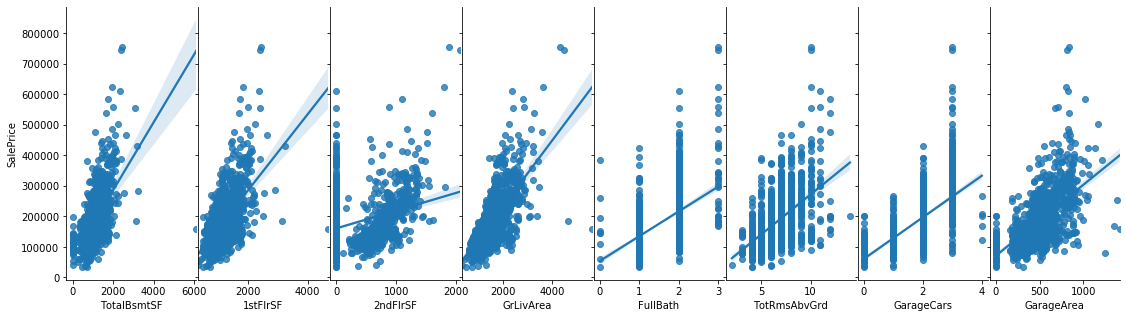

In [531]:
g = sns.PairGrid(df_new_selection, y_vars=['SalePrice'], x_vars=['TotalBsmtSF', 
 '1stFlrSF', 
 '2ndFlrSF', 
 'GrLivArea', 
 'FullBath', 
 'TotRmsAbvGrd', 
 'GarageCars', 
 'GarageArea'], height =20)
g.map(sns.regplot)
fig = plt.gcf()
# Modifie la taille du graphique
fig.set_size_inches(15,4)

Jointplot avec le coefficient de pearson pour le croisement SalePrice & GrLivArea.

coefficient de pearson:  0.502148650271804


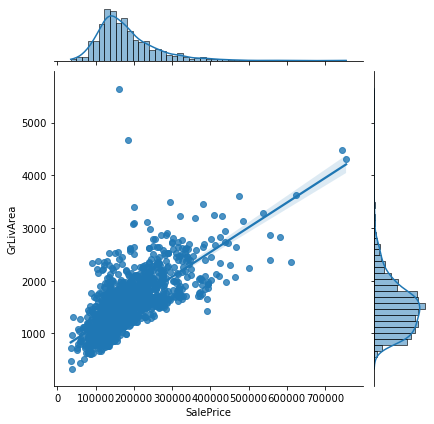

In [532]:
from scipy import stats

j = sns.jointplot(x = df_house["SalePrice"],y =df_house['GrLivArea'],kind ="reg")
print("coefficient de pearson: ",stats.pearsonr(df_house["SalePrice"],df_house['GrLivArea'])[0] **2);

# Focus variables qualitatives:

Réalisez un code permettant d'identifier automatiquement les variables de type Object

In [533]:
s_object = df_house.select_dtypes(include='object')
s_object.shape


(1460, 38)

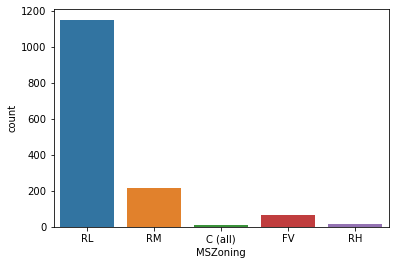

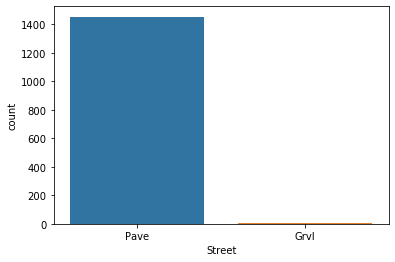

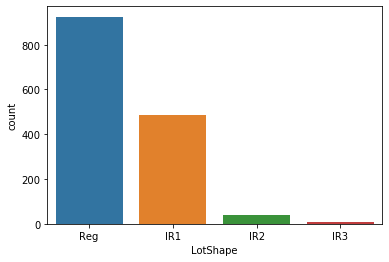

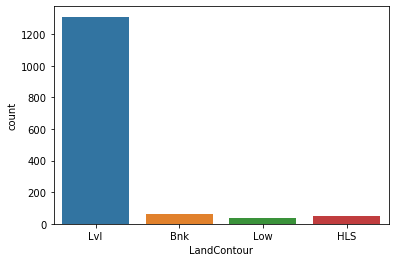

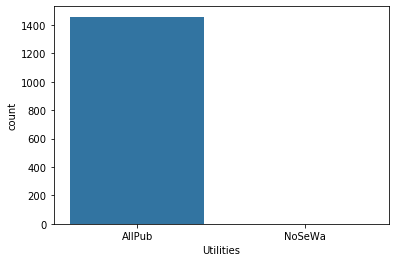

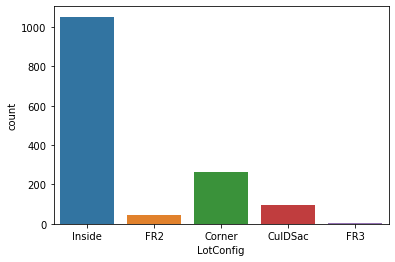

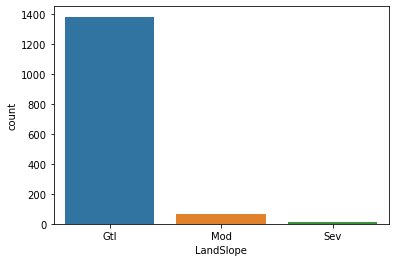

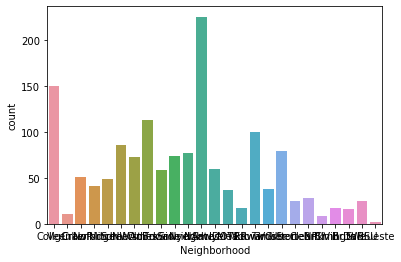

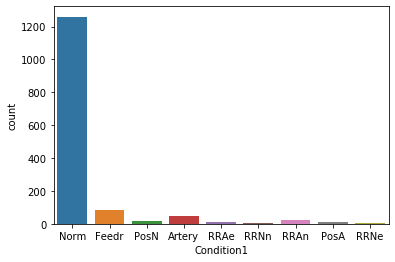

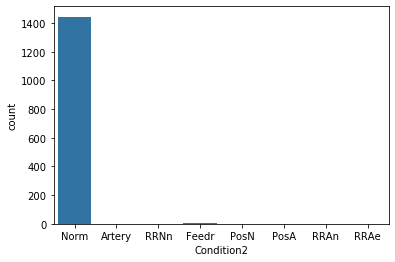

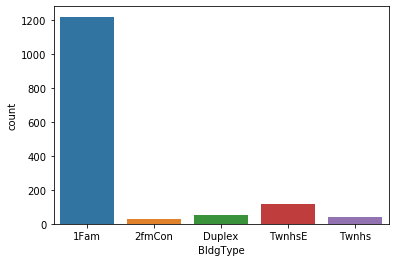

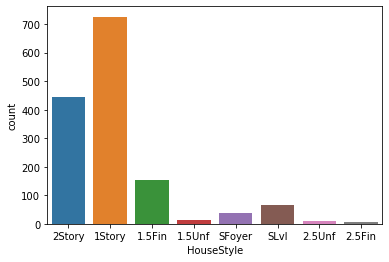

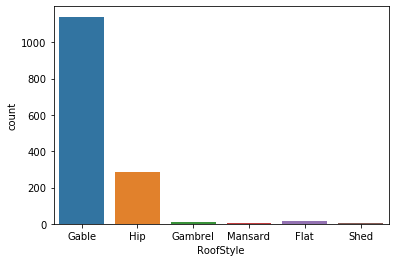

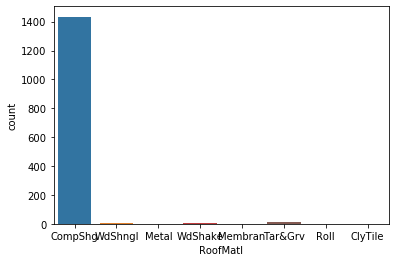

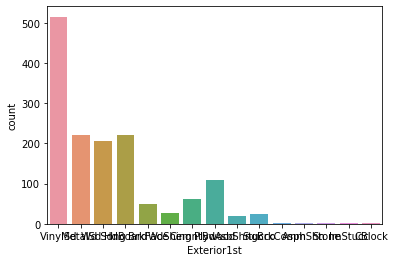

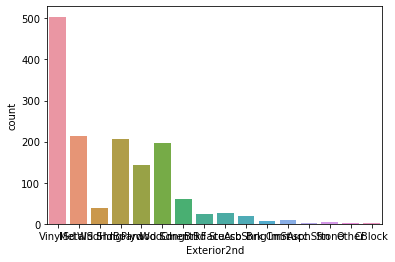

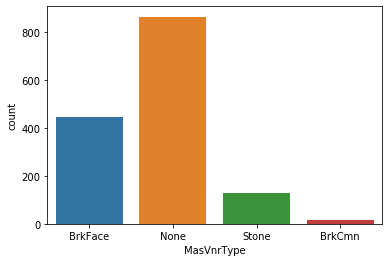

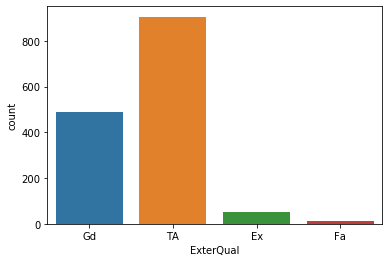

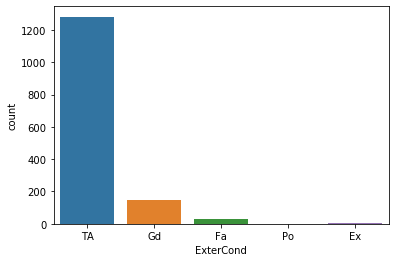

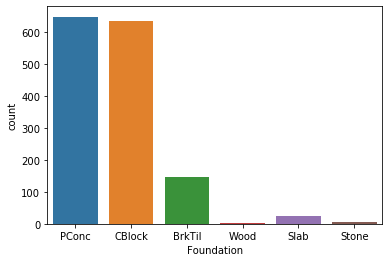

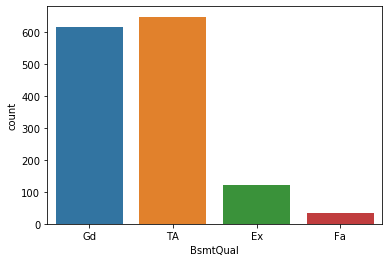

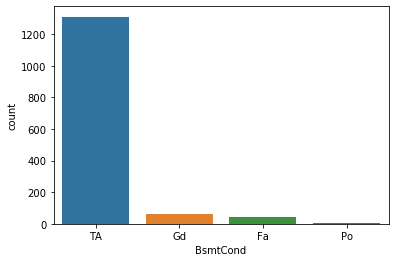

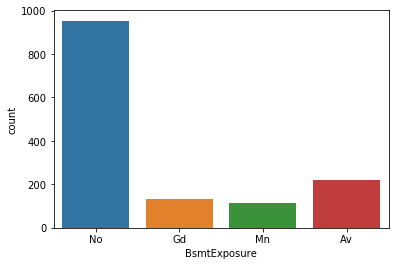

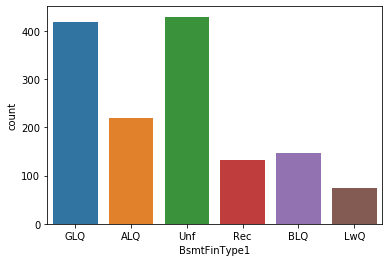

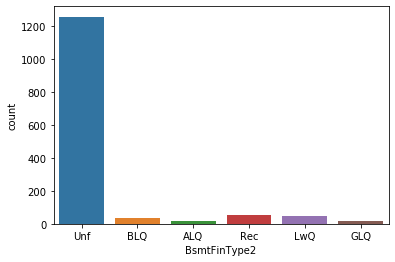

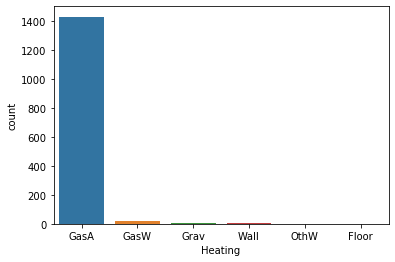

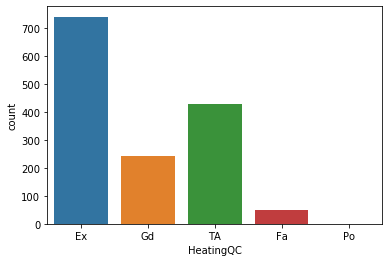

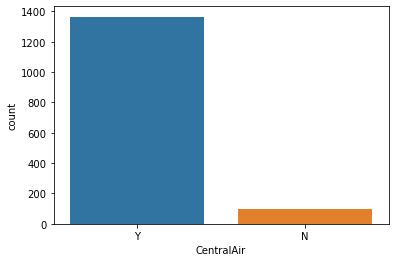

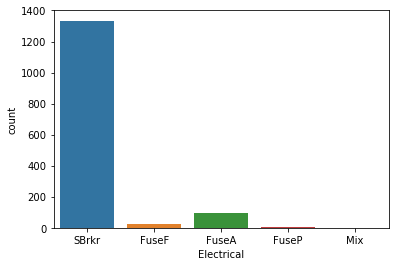

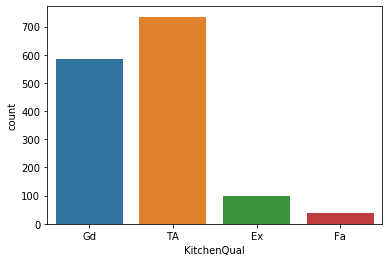

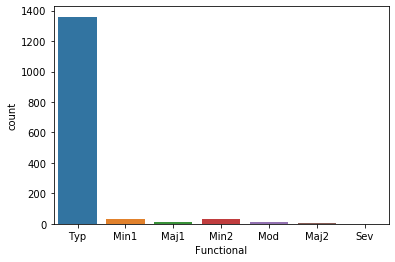

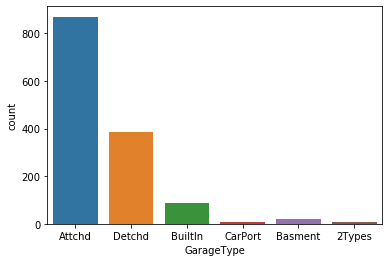

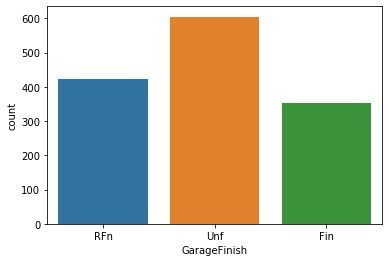

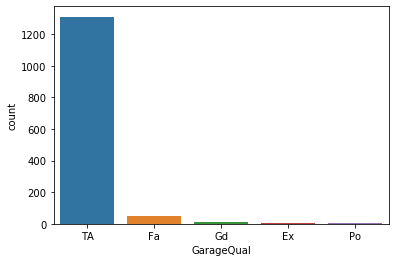

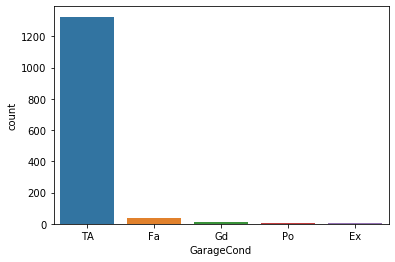

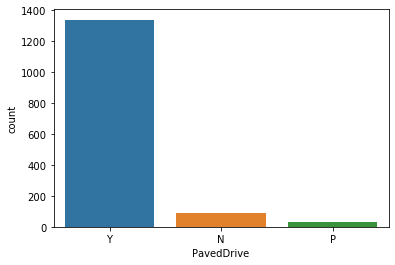

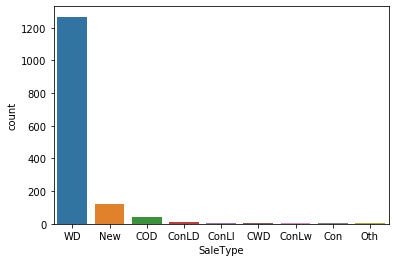

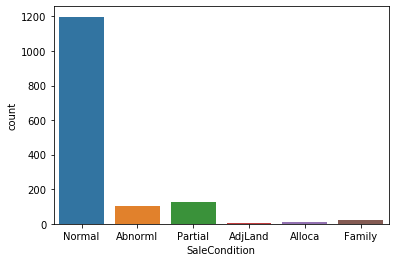

In [534]:
# f, axes = plt.subplots(9,5,figsize=(20,20), sharex=True)
for col in s_object.columns:
    sns.countplot(x=s_object[col])
    plt.show()

Listez au moins 5 variables que ne vous semble pas pertinente pour expliquer le prix d'une maison.

Les 5 variables qui ne me semblent pas pertinentes sont:
Street,
GarageQual,
CentralAir,
Utilities,
Functional

In [535]:
# La catégorie est trop présente dans la colonne pour permettre de visualiser des discriminations au sein de la variable.
#La variable n'a donc aucun intérêt pour notre étude
df_pave = df_house.loc[df_house['Street']=='Pave']
a = round(((df_pave['Street'].shape[0])*100)/1460,2)
print(a)

99.59


In [536]:
# La catégorie est trop présente dans la colonne pour permettre de visualiser des discriminations au sein de la variable.
#La variable n'a donc aucun intérêt pour notre étude
df_gq = df_house.loc[df_house['GarageQual']=='TA']
b = round(((df_gq['GarageQual'].shape[0])*100)/1460,2)
print(b)

89.79


In [537]:
# La catégorie est trop présente dans la colonne pour permettre de visualiser des discriminations au sein de la variable.
#La variable n'a donc aucun intérêt pour notre étude
df_ca = df_house.loc[df_house['CentralAir']=='Y']
c = round(((df_ca['CentralAir'].shape[0])*100)/1460,2)
print(c)

93.49


In [538]:
# La catégorie est trop présente dans la colonne pour permettre de visualiser des discriminations au sein de la variable.
#La variable n'a donc aucun intérêt pour notre étude
df_f = df_house.loc[df_house['Functional']=='Typ']
d = round(((df_f['Functional'].shape[0])*100)/1460,2)
print(d)

93.15


In [539]:
# La catégorie est trop présente dans la colonne pour permettre de visualiser des discriminations au sein de la variable.
#La variable n'a donc aucun intérêt pour notre étude
df_u = df_house.loc[df_house['Utilities']=='AllPub']
e = round(((df_u['Utilities'].shape[0])*100)/1460,2)
print(e)

99.93


# Exploration des données

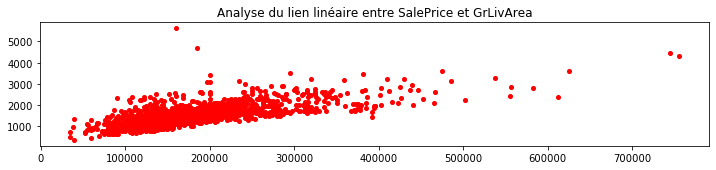

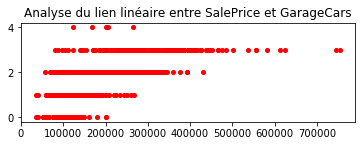

In [540]:
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(df_house['SalePrice'], df_house['GrLivArea'], 'ro', markersize=4)
plt.title("Analyse du lien linéaire entre SalePrice et GrLivArea")
plt.show()

plt.subplot(2,1,2)
plt.plot(df_house['SalePrice'], df_house['GarageCars'], 'ro', markersize=4)
plt.title("Analyse du lien linéaire entre SalePrice et GarageCars")
plt.show()

In [541]:
df_house['GarageCars'].nunique()

5

In [542]:
df_house['GrLivArea'].nunique()

861

Je définis ma variable cible et explicative

# SELECTING CATEGORIES

In [543]:
var_cont = df_house.select_dtypes(include='int')
var_cont.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [544]:
sort_categories = df_house.select_dtypes(include='object')
sort_categories.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

# Label Encoder

In [545]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X = df_house[list(sort_categories)]
var_l = X.apply(le.fit_transform)

In [546]:
var_l

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [547]:
# # une seule variable catégorielle
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# X = df_house['MSZoning']
# le.fit(X)
# le.classes_
# le.transform(X)

# One Hot Encoder

In [548]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
ohe = df_house[list(sort_categories)]
enc.fit(ohe)
OneHotEncoder()
ohe = enc.transform(ohe).toarray()

In [549]:
ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

# Sélection de la variable cible et des variables à explicative

In [570]:
test =  df_house['OverallQual', 'BsmtHalfBath']

IndexingError: Too many indexers

In [619]:
 df_house['SalePrice'].shape

(1460,)

Au vu du nombre de valeurs, je n'ai pas besoin de prélever un échantillon. 

In [620]:
y = df_house[['SalePrice']]

In [621]:
ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [622]:
X = ohe


# RÉGRESSION LINÉAIRE MULTIVARIÉE

# Division du jeu de données en training/validation/testing sets

In [623]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)

# Apprentissage sur le training set

On implémente la regression linéaire

In [624]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(xtrain, ytrain)

LinearRegression()

On obtient ainsi les parmètres β1 et β0 de notre modèle

In [625]:
xtrain.shape

(1168, 245)

In [626]:
regr.coef_.shape

(1, 245)

In [627]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
     .format(np.round(regr.coef_[0][1],2),np.round(regr.intercept_)))

Le coefficient β1 est égal à -1.0788732629801962e+17 tandis que l'intercept β0 est égal à [7.57212149e+18]


In [628]:
# x_to_predict = (3000, 200)
# x_df =  pd.DataFrame({'var_1': [x_to_predict[0]], 'var_2':[x_to_predict[1]]})

# # x_to_predict = (1556,441,7,2)
# # x_df =  pd.DataFrame({'surface': [x_to_predict[0]],

# print("Selon le modèle, un {} feet doit avoir un loyer de {} $"
#       .format(x_to_predict, np.round(regr.predict(x_df)[0])))

# print("\n")

# print ("On remarque que {} * {} + {} = {}"
#        .format(x_to_predict,np.round(regr.coef_[0],2),np.round(regr.intercept_),
#                x_to_predict*np.round(regr.coef_[0],2)+np.round(regr.intercept_)))



Enfin, on peut représenter notre modèle linéaire

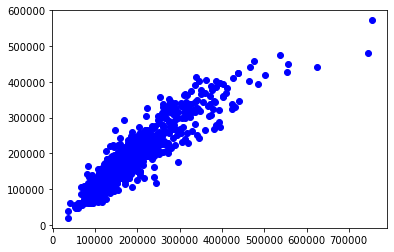

In [629]:
ytrainpred = regr.predict(xtrain)

plt.scatter(ytrain, ytrainpred, color='blue')

plt.show()

# Evaluation du modèle sur le testing set

In [630]:
from sklearn.metrics import mean_squared_error, r2_score


In [631]:
ytrainpred = regr.predict(xtrain)
ytestpred = regr.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(np.round(r2_score(ytrain, ytrainpred),3), np.round(r2_score(ytest, ytestpred),3)))


Pour les données d'entrainement le R2 vaut 0.836 alors que pour les données de test, il est de -2.5085706141922006e+24


In [632]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 32331.733 alors que pour les données de test, il est de 1.2296192215345843e+17


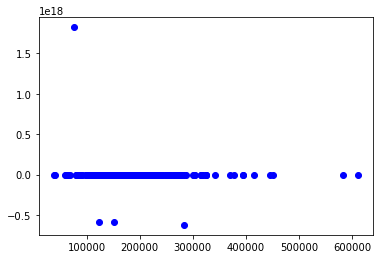

In [633]:
plt.scatter(ytest, ytestpred, color='blue')

plt.show()

# Régression linéaire Ridge

In [634]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
from sklearn.linear_model import Ridge

In [635]:
model = Ridge(alpha=10000)

In [636]:
model.fit(xtrain, ytrain)

Ridge(alpha=10000)

In [637]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
    .format(np.round(model.coef_[0][1],2),np.round(model.intercept_)))

# print("Le coefficient β2 est égal à {} tandis que l'intercept β0 est égal à {}"
#       .format(np.round(regr.coef_[0][1],2),np.round(regr.intercept_)))

Le coefficient β1 est égal à 117.29 tandis que l'intercept β0 est égal à [178772.]


In [638]:
# x_to_predict = (3000, 200)
# x_df =  pd.DataFrame({'var_1': [x_to_predict[0]], 'var_2':[x_to_predict[1]]})

# print("Selon le modèle, un {} feet doit avoir un loyer de {} $"
#       .format(x_to_predict, np.round(regr.predict(x_df)[0])))

# print("\n")

# print ("On remarque que {} * {} + {} = {}"
#        .format(x_to_predict,np.round(regr.coef_[0],2),np.round(regr.intercept_),
#                x_to_predict*np.round(regr.coef_[0],2)+np.round(regr.intercept_)))


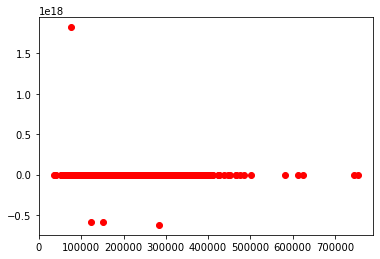

In [639]:
ytrainpred = regr.predict(xtrain)

plt.scatter(ytrain, ytrainpred, color='red')

plt.show()

# Evaluation du modèle sur le testing set

In [640]:
from sklearn.metrics import mean_squared_error, r2_score

In [641]:
ytrainpred = model.predict(xtrain)
ytestpred = model.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(np.round(r2_score(ytrain, ytrainpred),3), np.round(r2_score(ytest, ytestpred),3)))


Pour les données d'entrainement le R2 vaut 0.174 alors que pour les données de test, il est de 0.172


In [642]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 71790.933 alors que pour les données de test, il est de 73718.866


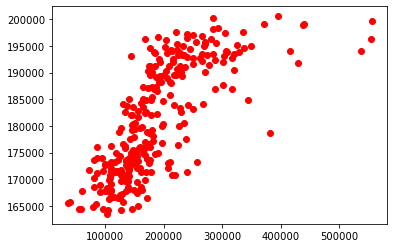

In [643]:
plt.scatter(ytest, ytestpred, color='red')

plt.show()

# Régression Lasso

In [644]:
from sklearn import linear_model
reg_l = linear_model.Lasso(alpha=135)
reg_l.fit(xtrain, ytrain)

Lasso(alpha=135)

In [645]:
print("Le coefficient β1 est égal à {} tandis que l'intercept β0 est égal à {}"
    .format(np.round(reg_l.coef_[0][1],2),np.round(reg_l.intercept_)))

IndexError: invalid index to scalar variable.

In [611]:
# x_to_predict = (3000, 200)
# x_df =  pd.DataFrame({'var_1': [x_to_predict[0]], 'var_2':[x_to_predict[1]]})

# print("Selon le modèle, un {} feet doit avoir un loyer de {} $"
#       .format(x_to_predict, np.round(reg_l.predict(x_df)[0])))

# print("\n")

# print ("On remarque que {} * {} + {} = {}"
#        .format(x_to_predict,np.round(reg_l.coef_[0],2),np.round(regr.intercept_),
#                x_to_predict*np.round(reg_l.coef_[0],2)+np.round(regr.intercept_)))


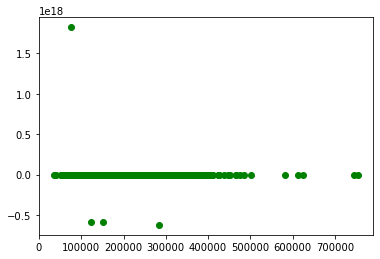

In [646]:
ytrainpred = regr.predict(xtrain)

plt.scatter(ytrain, ytrainpred, color='green')

plt.show()

# Evaluation du modèle sur le testing set

In [647]:
from sklearn.metrics import mean_squared_error, r2_score

In [648]:
ytrainpred = reg_l.predict(xtrain)
ytestpred = reg_l.predict(xtest)

print ("Pour les données d'entrainement le R2 vaut {} alors que pour les données de test, il est de {}" 
      .format(np.round(r2_score(ytrain, ytrainpred),3), np.round(r2_score(ytest, ytestpred),3)))


Pour les données d'entrainement le R2 vaut 0.816 alors que pour les données de test, il est de 0.806


In [649]:
print ("Pour les données d'entrainement le RMSE vaut {} alors que pour les données de test, il est de {}" 
      .format(round(mean_squared_error(ytrain, ytrainpred, squared=False),3), 
              round(mean_squared_error(ytest, ytestpred, squared=False),3)))

Pour les données d'entrainement le RMSE vaut 33847.426 alors que pour les données de test, il est de 35661.116


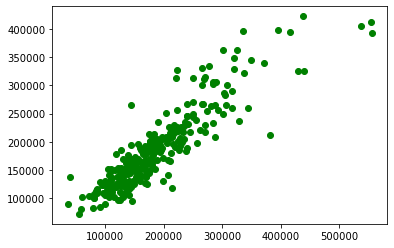

In [650]:
plt.scatter(ytest, ytestpred, color='green')

plt.show()

# gridsearch

In [651]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [652]:
# load datasets
dataset = df_house.copy()
# prepare a range of alpha values to test
alphas = np.array([135,136,137,138,139,140,141,142,143,144,145])

# LASSO

In [653]:
# create and fit a ridge regression model, testing each alpha
L_model = Lasso()
L_grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas))
L_grid.fit(X, y)
print(L_grid)
# summarize the results of the grid search
print(L_grid.best_score_)
print(L_grid.best_estimator_.alpha)

GridSearchCV(estimator=Ridge(alpha=10000),
             param_grid={'alpha': array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145])})
0.7059417258751455
135


# RIDGE

In [654]:
# create and fit a ridge regression model, testing each alpha
R_model = Ridge()
R_grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
R_grid.fit(X, y)
print(R_grid)
# summarize the results of the grid search
print(R_grid.best_score_)
print(R_grid.best_estimator_.alpha)

GridSearchCV(estimator=Ridge(alpha=10000),
             param_grid={'alpha': array([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145])})
0.7059417258751455
135
